In [72]:
#import modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
%matplotlib inline

In [73]:
#import JSON files
logins_df = pd.read_json("logins.json")


##  Part 1 ‑ Exploratory data analysis
<font size="3"> The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute
time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them. </font>

In [74]:
logins_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [75]:
# Initial check for data quality: No null values - good!
logins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [76]:
# Aggregate login counts based on 15-minute time intervals
logins_df.set_index('login_time', inplace=True)
logins_df['count'] = 1
logins_df = logins_df.resample('15T').sum()

In [77]:
logins_df.head(5)

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [78]:
logins_df.tail(5)

,count
login_time,
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2
1970-04-13 18:30:00,7
1970-04-13 18:45:00,6


In [79]:
logins_df.shape

(9788, 1)

In [80]:
logins_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 1 columns):
count    9788 non-null int64
dtypes: int64(1)
memory usage: 152.9 KB


In [81]:
# Exstract features from the dataset
logins_df['time'] = pd.to_datetime(logins_df.index)

In [82]:
print(type(logins_df.time[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [83]:
#create aggregates based on month, day, week, hour, weekday
logins_df['month'] = logins_df.time.dt.month
logins_df['day'] = logins_df.time.dt.day
logins_df['hour'] = logins_df.time.dt.hour
logins_df['week'] = logins_df.time.dt.week
logins_df['weekday'] = logins_df.time.dt.weekday

In [84]:
logins_df.head()

,count,time,month,day,hour,week,weekday
login_time,,,,,,,
1970-01-01 20:00:00,2,1970-01-01 20:00:00,1,1,20,1,3
1970-01-01 20:15:00,6,1970-01-01 20:15:00,1,1,20,1,3
1970-01-01 20:30:00,9,1970-01-01 20:30:00,1,1,20,1,3
1970-01-01 20:45:00,7,1970-01-01 20:45:00,1,1,20,1,3
1970-01-01 21:00:00,1,1970-01-01 21:00:00,1,1,21,1,3


In [85]:
logins_df.tail()

,count,time,month,day,hour,week,weekday
login_time,,,,,,,
1970-04-13 17:45:00,5,1970-04-13 17:45:00,4,13,17,16,0
1970-04-13 18:00:00,5,1970-04-13 18:00:00,4,13,18,16,0
1970-04-13 18:15:00,2,1970-04-13 18:15:00,4,13,18,16,0
1970-04-13 18:30:00,7,1970-04-13 18:30:00,4,13,18,16,0
1970-04-13 18:45:00,6,1970-04-13 18:45:00,4,13,18,16,0


###  Login activities by month

In [86]:
# Group by month
print ('[Grouping by month]')
print (logins_df.groupby('month')['count'].aggregate(np.sum))
print('***************************')
print('April extrapolated data: ' + str((30/13)*13507))

[Grouping by month]
month
1    21239
2    24673
3    33723
4    13507
Name: count, dtype: int64
***************************
April extrapolated data: 31169.999999999996


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

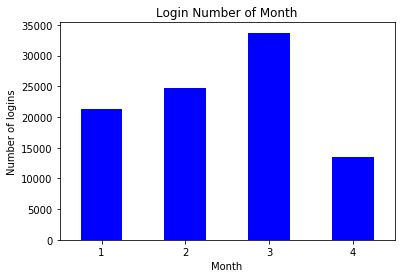

In [87]:
#bar plot of monthly login activities
logins_df.groupby('month')['count'].sum().plot(kind='bar', color='blue')
plt.title("Login Number of Month")
plt.xlabel("Month")
plt.ylabel("Number of logins")
plt.xticks(rotation=0)

Login number increase from January to March. The login number of March is highest. April has only 13 days and if we extrapoltae based on the first 13 days, then it is similar to March logins. This increase in logins can be attributed to increase in activities probably from pickup in employment after a holiday season.

### Login activities in different weeks


In [88]:
print('Logins in each week')
print(logins_df.groupby('week')['count'].sum())

Logins in each week
week
1     2374
2     5217
3     5023
4     4751
5     4744
6     5572
7     5915
8     7035
9     6554
10    7398
11    7338
12    8955
13    7285
14    8095
15    6491
16     395
Name: count, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

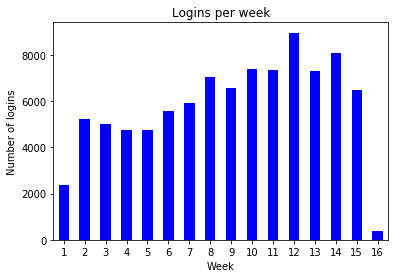

In [89]:
#bar plot of weekly login activities
logins_df.groupby('week')['count'].sum().plot(kind='bar', color='blue')
plt.title("Logins per week")
plt.xlabel("Week")
plt.ylabel("Number of logins")
plt.xticks(rotation=0)

Week 12 has the largest logins. Its the 4th week of March

### Login activity on different days of the week


In [90]:
# Group by weekday
import calendar
nweek = 16   # total weeks 
print ('[Grouping by weekday]')
print (logins_df.groupby('weekday')['count'].aggregate(np.sum)/nweek)


[Grouping by weekday]
weekday
0     551.4375
1     579.2500
2     646.1875
3     747.5000
4     950.5000
5    1211.0625
6    1135.4375
Name: count, dtype: float64


[Text(0, 0, 'Monday'),
 Text(0, 0, 'Tuesday'),
 Text(0, 0, 'Wednesday'),
 Text(0, 0, 'Thursday'),
 Text(0, 0, 'Friday'),
 Text(0, 0, 'Saturday'),
 Text(0, 0, 'Sunday')]

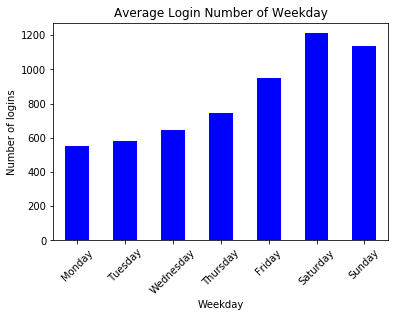

In [91]:
ax = (logins_df.groupby('weekday')['count'].sum()/nweek).plot(kind='bar', color='blue')
plt.title("Average Login Number of Weekday")
plt.xlabel("Weekday")
plt.ylabel("Number of logins")
plt.xticks(rotation=45)
ax.set_xticklabels([calendar.day_name[d] for d in range(7)])

Saturday and Sundays have the highest loigins.
Logins increases as the week progresses with Friday having the ighest bookings of all weekdays

In [92]:
#resample data
df1 = pd.read_json("logins.json")
df1.set_index('login_time', inplace=True)
df1['count'] =1
df_day = df1.resample('D').sum()
df_day.head()

,count
login_time,
1970-01-01,112
1970-01-02,681
1970-01-03,793
1970-01-04,788
1970-01-05,459


In [93]:
df_day['date'] = pd.to_datetime(df_day.index)
df_day['weekday'] = df_day.date.dt.weekday
df_day.head()

,count,date,weekday
login_time,,,
1970-01-01,112,1970-01-01,3
1970-01-02,681,1970-01-02,4
1970-01-03,793,1970-01-03,5
1970-01-04,788,1970-01-04,6
1970-01-05,459,1970-01-05,0


[Text(0, 0, 'Monday'),
 Text(0, 0, 'Tuesday'),
 Text(0, 0, 'Wednesday'),
 Text(0, 0, 'Thursday'),
 Text(0, 0, 'Friday'),
 Text(0, 0, 'Saturday'),
 Text(0, 0, 'Sunday')]

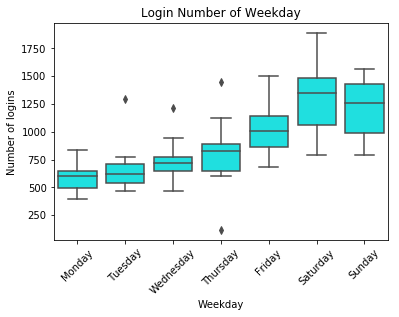

In [94]:
import seaborn as sns

ax = sns.boxplot(x='weekday', y='count', color='cyan',data=df_day)
plt.title("Login Number of Weekday")
plt.xlabel("Weekday")
plt.ylabel("Number of logins")
plt.xticks(rotation=45)
ax.set_xticklabels([calendar.day_name[d] for d in range(7)])

Box plot shows more information about summary stats. Also, we see some outliers.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

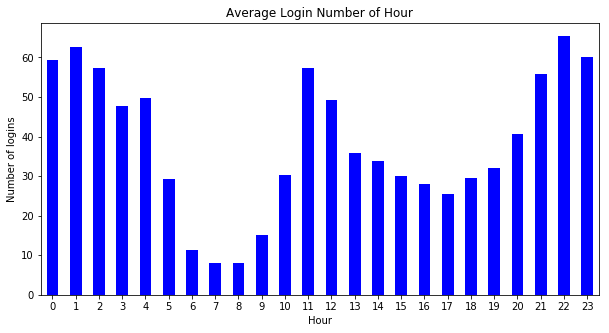

In [95]:
# Group by hour
nday = 30+28+30+13   # total days
(logins_df.groupby('hour')['count'].sum()/nday).plot(kind='bar', color='blue', figsize=(10,5))
plt.title("Average Login Number of Hour")
plt.xlabel("Hour")
plt.ylabel("Number of logins")
plt.xticks(rotation=0)

Logins are highest from 10 PM to 2 AM and during noon hours between 11:00 AM to 1:00 PM. Logins are lowest in the mornings between 6:00 Am and 9:00AM. 

In [96]:
# Aggregate login counts based on 1-hour time intervals
df_hour = df1.resample('H').sum()
df_hour.head()

,count
login_time,
1970-01-01 20:00:00,24
1970-01-01 21:00:00,9
1970-01-01 22:00:00,21
1970-01-01 23:00:00,58
1970-01-02 00:00:00,53


In [97]:
df_hour['time'] = pd.to_datetime(df_hour.index)
df_hour['hour'] = df_hour.time.dt.hour
df_hour.head()

,count,time,hour
login_time,,,
1970-01-01 20:00:00,24,1970-01-01 20:00:00,20
1970-01-01 21:00:00,9,1970-01-01 21:00:00,21
1970-01-01 22:00:00,21,1970-01-01 22:00:00,22
1970-01-01 23:00:00,58,1970-01-01 23:00:00,23
1970-01-02 00:00:00,53,1970-01-02 00:00:00,0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

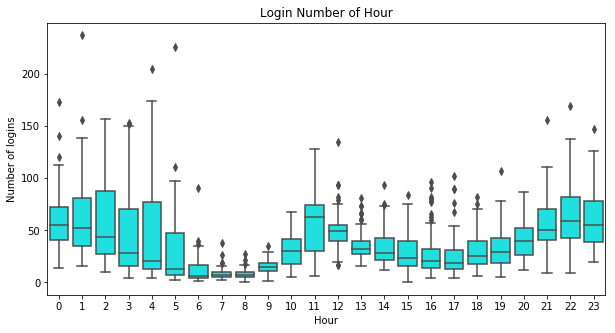

In [98]:
sns.mpl.rc("figure", figsize=(10,5))
sns.boxplot(x='hour', y='count', data=df_hour, color='cyan')
plt.title("Login Number of Hour")
plt.xlabel("Hour")
plt.ylabel("Number of logins")
plt.xticks(rotation=0)

Bar plot captures outliers suggesting there is wider daily variations in logins . And vary range of 2~4 AM are bigger than other time.

### Result:

Login counts kept increasing from January to March and reached the peak in March.

In a week's step, login counts rised and droped a little. Logins in week 12 are the most. It is the last week of March. Logins in week 14 are the second most. It is the second week of April.

Login number kept increasing from Monday to Saturday. There are more logins in weekends than in weekdays. Logins on Saturday are the most, and logins on Sunday are the second most, while logins on Friday are the third most. Login numbers on weekends varied most.

Most logins are at night, from 10 PM to 2 AM. Least logins are in the moring. There are more logins at noon than in the afternoon. Login counts varied most from 2 AM to 4 AM.

## Part 2: Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
how you will implement the experiment.
what statistical test(s) you will conduct to verify the significance of the observation.
how you would interpret the results and provide recommendations to the city operations team along with any caveats.

### Solution:
Currently, the drivers are exclusive to either Gotham or Metropolis. Therefore, a measure to check the driver activity in each city is a good metric to check if the drivers are serving both cities.

The drivers tend to stay closer to their homes and their cities. The experiment is to incentivize the drivers to follow the demand pattern and serve the customers in both cities. The tolls are reimbursed for the drivers in both directions and drivers are paid a slight surcharge to go to the other city if the demand is more there. 

For the experiment to be successful, the miles driven by each driver on a weekly basis should be similar and the standard deviation of the average miles driven by drivers should be as small as possible. The drivers activity in either city should tend towards 50%. 

Significance tests at 95% CI and Hypothesis tests to verify the data will prove if the experiment is working 




## Part 3 ‑ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days. We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.

3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

### Data description
<p> ● city: city this user signed up in </p>
<p> ● phone: primary device for this user </p>
<p> ● signup_date: date of account registration; in the form ‘YYYY MM DD’ </p>
<p> ● last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’ </p>
<p> ● avg_dist: the average distance in miles per trip taken in the first 30 days after signup </p>
<p> ● avg_rating_by_driver: the rider’s average rating over all of their trips </p>
<p> ● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips </p>
<p> ● surge_pct: the percent of trips taken with surge multiplier > 1 </p>
<p> ● avg_surge: The average surge multiplier over all of this user’s trips </p>
<p> ● trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up </p>
<p> ● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise </p>
<p> ● weekday_pct: the percent of the user’s trips occurring during a weekday </p>

### 1. Data loading and cleaning for analysis

In [123]:
with open('ultimate_data_challenge.json') as json_file:
    data = json.load(json_file)

In [124]:
df = pd.DataFrame(data)
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [126]:
#fill missing values
df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(), inplace=True)
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean(), inplace=True)
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  49604 non-null float64
avg_rating_by_driver      49604 non-null float64
avg_rating_of_driver      49604 non-null float64
avg_surge                 49604 non-null float64
city                      49604 non-null object
last_trip_date            49604 non-null object
phone                     49604 non-null object
signup_date               49604 non-null object
surge_pct                 49604 non-null float64
trips_in_first_30_days    49604 non-null int64
ultimate_black_user       49604 non-null bool
weekday_pct               49604 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.6+ MB


### Exploratory Data Analysis


In [127]:
# Create box plots of all categorical, non-date data
categorical_features = ['city', 'phone', 'ultimate_black_user']

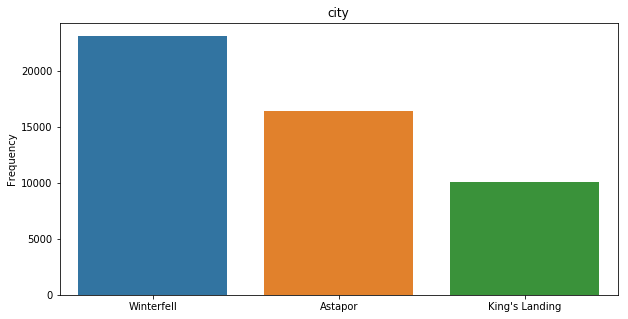

Winterfell        23125
Astapor           16413
King's Landing    10066
Name: city, dtype: int64


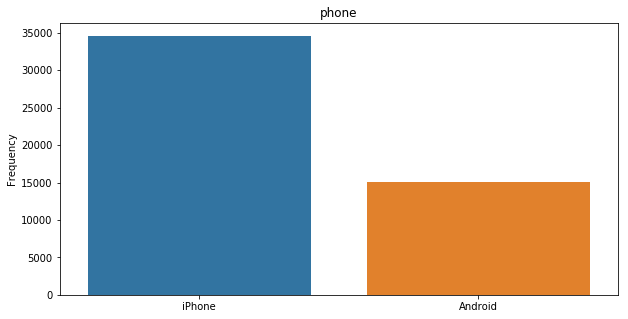

iPhone     34582
Android    15022
Name: phone, dtype: int64


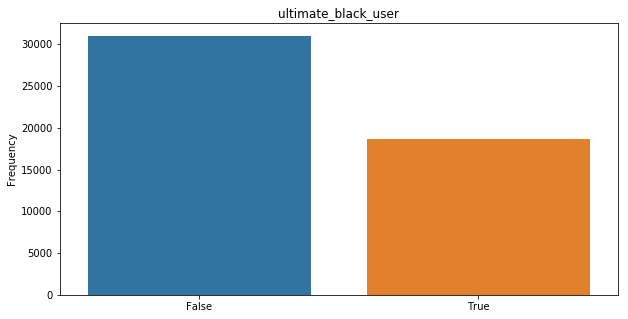

False    30992
True     18612
Name: ultimate_black_user, dtype: int64


In [128]:
for feature in categorical_features:
    sns.barplot(x = list(df[feature].value_counts().index), y = df[feature].value_counts())
    plt.title(feature)
    plt.ylabel('Frequency')
    plt.show()
    print(df[feature].value_counts())

In [129]:
# What fraction of observed users were retained?
latest_date = max(df.last_trip_date)
latest_date

'2014-07-01'

Based on the last trip date in the dataset of 7/1/2014, it looks like the data was pulled on July 1st, 2014. By definition, retained users made a trip within the last 30 days of this date. Let's see how many users have been retained:

In [130]:
print('{:.2f}% of users have taken a trip on or after June 1st, 2014 and are considered \'retained\'.'\
      .format(len(df[df['last_trip_date'] >= '2014-06-01'])/len(df)*100))

37.64% of users have taken a trip on or after June 1st, 2014 and are considered 'retained'.


### 2. Predictive model
Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.

In [131]:
#Define target variable 'retained'
df['retained'] = np.nan
df.loc[df['last_trip_date'] >= '2014-06-01', 'retained'] = 1
df.loc[df['last_trip_date'] < '2014-06-01', 'retained'] = 0

df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1.0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0.0


In [132]:
#Since we have created the target feature based on the last_trip_date feature, we need to drop last_trip_date.
#also make a new dataframe to modify for model building 
df1 =df
df1.drop('last_trip_date', axis=1, inplace=True)
df1.drop('signup_date', axis=1, inplace=True)
df1.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained
0,3.67,5.0,4.7,1.10,King's Landing,iPhone,15.4,4,True,46.2,1.0
1,8.26,5.0,5.0,1.00,Astapor,Android,0.0,0,False,50.0,0.0
2,0.77,5.0,4.3,1.00,Astapor,iPhone,0.0,3,False,100.0,0.0
3,2.36,4.9,4.6,1.14,King's Landing,iPhone,20.0,9,True,80.0,1.0
4,3.13,4.9,4.4,1.19,Winterfell,Android,11.8,14,False,82.4,0.0


In [133]:
# Creating dummy variables for categorical features
df_encoded = pd.get_dummies(df1, columns = ['city', 'phone', 'ultimate_black_user'])

df_encoded.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,retained,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,3.67,5.0,4.7,1.10,15.4,4,46.2,1.0,0,1,0,0,1,0,1
1,8.26,5.0,5.0,1.00,0.0,0,50.0,0.0,1,0,0,1,0,1,0
2,0.77,5.0,4.3,1.00,0.0,3,100.0,0.0,1,0,0,0,1,1,0
3,2.36,4.9,4.6,1.14,20.0,9,80.0,1.0,0,1,0,0,1,0,1
4,3.13,4.9,4.4,1.19,11.8,14,82.4,0.0,0,0,1,1,0,1,0


In [134]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 15 columns):
avg_dist                     49604 non-null float64
avg_rating_by_driver         49604 non-null float64
avg_rating_of_driver         49604 non-null float64
avg_surge                    49604 non-null float64
surge_pct                    49604 non-null float64
trips_in_first_30_days       49604 non-null int64
weekday_pct                  49604 non-null float64
retained                     49604 non-null float64
city_Astapor                 49604 non-null uint8
city_King's Landing          49604 non-null uint8
city_Winterfell              49604 non-null uint8
phone_Android                49604 non-null uint8
phone_iPhone                 49604 non-null uint8
ultimate_black_user_False    49604 non-null uint8
ultimate_black_user_True     49604 non-null uint8
dtypes: float64(7), int64(1), uint8(7)
memory usage: 3.7 MB


We will move forward by splitting this data into train and test sets, and model the data with a decision tree classifier. In addition, the decision tree does not handle data if it is not numerical in nature. We must drop all datetime features and one-hot-encode any categorical features.
The decision tree is a good choice in this scenario due to its interpretability and ease of finding the most predictive features of retention. In addition, the decision tree gives the best baseline accuracy compared to logistic regression, naive bayes, k-nearest-neighbors, random forest, bagged random forest, and bagged random (extra) tree classifiers.

In [135]:
# dividing X, y into train and test data 
from sklearn.model_selection import train_test_split
X = df_encoded.drop(['retained'], axis=1)
y = df.retained
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0) 
  
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(34722, 14)
(14882, 14)
(34722,)
(14882,)


### Random Forest Classifier

In [136]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

In [137]:
clf = RandomForestClassifier()
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
print(cv_scores)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

C:\Users\GG\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\GG\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\GG\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\GG\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\GG\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: T

[0.7449964  0.75665947 0.75259217 0.73862327 0.75144009]
Average 5-Fold CV Score: 0.7488622794969029


#### Hyperparameter tuning

In [142]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [143]:
# Define function to get metrics of the model
def get_metrics(true_labels, predicted_labels):
    print ('Accuracy: ', accuracy_score(true_labels,predicted_labels))
    print (classification_report(true_labels, predicted_labels))

In [144]:
# Create the hyperparameter grid
n_options = [10,20,50,100,200]
feature_options = [5, 8, 10, 'auto', None]
oob_options = [True, False]
param_grid = {'n_estimators': n_options, 'max_features': feature_options, 'oob_score': oob_options}

In [145]:
# Instantiate the GridSearchCV object
clf_cv = GridSearchCV(clf, param_grid, cv=5)
# build model    
clf_cv.fit(X_train, y_train)
# predict using model
y_predict = clf_cv.predict(X_test)

C:\Users\GG\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\GG\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\GG\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\GG\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\GG\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few tre

C:\Users\GG\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\GG\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\GG\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\GG\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\GG\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few tre

C:\Users\GG\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\GG\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\GG\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\GG\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\GG\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few tre

In [146]:
# Print the optimal parameters and best score
print("Tuned Parameter: {}".format(clf_cv.best_params_))
print("Tuned Score: {}".format(clf_cv.best_score_))
print()
# evaluate model prediction performance 
print ('Test set performance:')
get_metrics(true_labels=y_test, predicted_labels=y_predict)

Tuned Parameter: {'max_features': None, 'n_estimators': 200, 'oob_score': True}
Tuned Score: 0.7580496515177697

Test set performance:
Accuracy:  0.755476414460422
              precision    recall  f1-score   support

         0.0       0.79      0.82      0.81      9278
         1.0       0.69      0.65      0.67      5604

    accuracy                           0.76     14882
   macro avg       0.74      0.73      0.74     14882
weighted avg       0.75      0.76      0.75     14882



After hyperparameter tuning, we get the best parameters of n_estimators=100, max_features=8, oob_score=True with accuracy of 76.82%.

###  Tuned Random Forest  Model


In [158]:
rfc = RandomForestClassifier(n_estimators=200, max_features=None, oob_score=True)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [159]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [160]:
# Generate classification report
print(classification_report(y_test, y_pred))
print('Test set accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))

              precision    recall  f1-score   support

         0.0       0.79      0.82      0.81      9278
         1.0       0.69      0.65      0.67      5604

    accuracy                           0.76     14882
   macro avg       0.74      0.74      0.74     14882
weighted avg       0.75      0.76      0.75     14882

Test set accuracy: 75.63%


In [161]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
pd.DataFrame(cm, index=range(0,2), columns=range(0,2))

,0,1
0,7618,1660
1,1966,3638


Text(0.5, 1.0, 'ROC Curve')

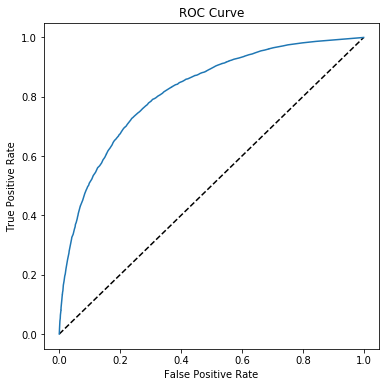

In [162]:
# Compute predicted probabilities
y_pred_prob = rfc.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(6,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

In [163]:
# Compute and print AUC score
print("AUC: {:.4f}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.8181


In [164]:
#Feature Selection
fi = pd.DataFrame(list(zip(X.columns, rfc.feature_importances_)), columns = ['features', 'Importance'])
fi.sort_values(by='Importance', ascending=False).head(5)

,features,Importance
0,avg_dist,0.297778
1,avg_rating_by_driver,0.181957
6,weekday_pct,0.114209
2,avg_rating_of_driver,0.081505
5,trips_in_first_30_days,0.068293


From the importance of features, we find that the most important 3 features are:

avg_dist: the average distance in miles per trip taken in the first 30 days after signup 

avg_rating_by_driver: the rider’s average rating over all of their trips 

weekday_pct: the percent of the user’s trips occurring during a weekday 

### Suggestions to Ultimate

This model has good accuracy to predict rider retention at 76% 

The most important features that affect retention in the order are: 
<p> Average distance driven by customer -- this suggests retention increases if customers are able to get rides ready to drive long distaces </p>
<p> The next most important feature is the ratings by driver  </p>
<p> Also, weekday availability of rides improves retention. Therefore, it is a good idea to encourage the drivers to drive more on weekdays to improve service </p>

###  Check other methods: Decision Tree Classifier

In [154]:
#DECISION TREE CLASSIFIER
# importing necessary libraries 
from sklearn import datasets 
from sklearn.metrics import confusion_matrix 
import time
start = time.process_time()  


In [155]:
# training a DescisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(max_depth = 4).fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test) 

#Accuracy 
accuracy = dtree_model.score(X_test, y_test)
print('Model Accuracy: '+ str(accuracy))


importance = dtree_model.feature_importances_
importance = pd.DataFrame(importance,  index =X.columns, columns=["Importance",])
importance = importance.sort_values(['Importance'], ascending=False).head(5)
print('*************************************')
print('Feature Importance is {}'.format(importance))
print('*************************************')
print('process time: {}'.format(time.process_time() - start))

Model Accuracy: 0.7396855261389598
*************************************
Feature Importance is                            Importance
avg_rating_by_driver         0.544347
city_King's Landing          0.224145
phone_iPhone                 0.125817
surge_pct                    0.048037
ultimate_black_user_False    0.030190
*************************************
process time: 0.09375


In [156]:
#confusion matrix
cm = confusion_matrix(y_test, dtree_predictions)
pd.DataFrame(cm, index=range(0,2), columns=range(0,2))

,0,1
0,7187,2091
1,1783,3821


In [157]:
#training accuracy
accuracy1 = dtree_model.score(X_train, y_train)
print('Training Model Accuracy: '+ str(accuracy1))

Training Model Accuracy: 0.7490351938252405


Both training and test accuracy are simialr and therefore we can avoid cross validation 

###  Check other methods: SVC (Support Vector Classifier)


In [ ]:
# training a DescisionTreeClassifier 
from sklearn.svm import SVC
clf = SVC(gamma='auto')

svm_model = clf.fit(X_train, y_train) 
svm_predictions = svm_model.predict(X_test) 


In [171]:
#Accuracy 
accuracy = svm_model.score(X_test, y_test)
print('Model Accuracy: '+ str(accuracy))


print('*************************************')
print('Model predictions is {}'.format(svm_predictions))
print('*************************************')
print('process time: {}'.format(time.process_time() - start))

Model Accuracy: 0.7616583792501008
*************************************
Model predictions is [0. 0. 1. ... 0. 1. 0.]
*************************************
process time: 419.421875


In [172]:
#confusion matrix
cm = confusion_matrix(y_test, svm_predictions)
pd.DataFrame(cm, index=range(0,2), columns=range(0,2))

,0,1
0,7931,1347
1,2200,3404
